In [2]:
import sys
import os

# Add the src directory to the path
sys.path.append(os.path.abspath('..'))
print (os.path.abspath('..'))

/Volumes/Long Term Backup/INL/Desktop/Research/16. Quindcert/quindcert/src


In [3]:
# Printing utils
from IPython.display import display_html, HTML
from IPython.display import display, Math

def generate_latex_matrix(matrix):
    # Start the LaTeX matrix code
    latex_code = r"\begin{bmatrix}"
    
    # Add each row to the LaTeX code
    for row in matrix:
        latex_code += " & ".join(map(str, row)) + r" \\ "
    
    # End the LaTeX matrix code
    latex_code += r"\end{bmatrix}"
    
    # Return the LaTeX code for further use if needed
    return latex_code

In [4]:
from base.devices import DeviceMode

from photonic_indistinguishability_measures.bunching import BunchingCalculator
from quandela.quandela_devices import QuandelaDeviceFactory
from quandela.quandela_devices import QuandelaLocalDevices, QuandelaRemoteDevices

number_of_modes = 3


device = QuandelaDeviceFactory().create_local_device (str (QuandelaLocalDevices.NAIVE.value), DeviceMode.SAMPLER)

bc = BunchingCalculator (device, number_of_modes)

P_fb_i = bc.do_the_experiments_for_full_bunching_indistinguishable_case ()
display(Math("\\text {Probability of full bunching for the indistinguishable scenario: }")), 
display(Math("P_{Fb} (S_1) = " + str (P_fb_i)))

P_fb_d = bc.do_the_experiments_for_full_bunching_distinguishable_case ()
display(Math("\\text {Probability of full bunching for the distinguishable scenario: }")), 
display(Math("P_{Fb} (S_2) = " + str (P_fb_d)))


latex_string = '\\frac {P_{Fb} (S_1)}{P_{Fb} (S_2)} = \\frac {Per (S_1)}{Per (S_2)} \\implies \\frac{' + str (P_fb_i) + "}{"+ str (P_fb_d)+"} = \\frac{Per (S_1)}{1} \\Leftrightarrow Per (S_1) = " + str (P_fb_i/P_fb_d)

display(Math("\\text {Due to the know results about ratios between full bunching probabilities: }"))
display(Math(latex_string))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

/usr/local/lib/python3.9/site-packages/perceval/utils/statevector.py:98: UserWarning: Unable to normalize a distribution with only null probabilities
  warnings.warn("Unable to normalize a distribution with only null probabilities")


RuntimeError: No state to sample from

In [5]:
from photonic_indistinguishability_measures.variance import Variance

variance_calculator = Variance(device, number_of_modes)


#print ("Variance for the indistinguishable scenario: ", var_i)
#print ("", var_d)
display(Math("\\text {Minimum and maximum variance for }" + str (number_of_modes) + "\\text { modes :}"))
max_variance = Variance.calculate_max_expected_variance(number_of_modes)
latex_max_variance = "\\sigma_{max} = 2 - \\frac {2}{"+ str (number_of_modes) + "}"

min_variance = Variance.calculate_min_expected_variance(number_of_modes)
latex_min_variance = "\\sigma_{min} = 1 - \\frac {1}{"+ str (number_of_modes) + "}"
display(Math(latex_min_variance + "  ;  " + latex_max_variance))


var_i = variance_calculator.execute_experiment_variance_indistinguishable_scenario (number_of_modes)
var_d = variance_calculator.execute_experiment_variance_distinguishable_scenario(number_of_modes)


display(Math("\\text {Variance for the indistinguishable scenario: } "))
display(Math("\\sigma_i = " + str (var_i)))
display(Math("\\text {Variance for the distinguishable scenario: }"))
display(Math("\\sigma_d = "+ str (var_d)))


if number_of_modes == 3:
    display(Math("\\text {Minimum bound for 3 mode scenario: }"))    
    latex_min_bound = "min_{a \\neq b} \\Delta_{ab} \\ge \\left( \\frac {9}{4} \\sigma_i - 2 \\right)^2 \\ge \\left("+str (variance_calculator.calculate_minimum_three_modes (var_i))+"\\right)^2 \\ge " + str (variance_calculator.calculate_minimum_three_modes (var_i)**2)  
    display(Math(latex_min_bound))   

bound = Variance.calculate_bound_average_n_modes (var_i, var_d, number_of_modes)
latex_bound = "\hat {\Delta} \ge \\frac {1}{n (n-1)} \\left(\\frac {\\sigma_i - 2 \\sigma^d +1}{1 - \\sigma^d}\\right) - \\frac {1}{n-1} \ge " + str (bound)

display(Math("\\text {Bound for average overlap (}" + "\hat {\Delta}):"))
display(Math(latex_bound))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

RuntimeError: No state to sample from

In [6]:
from quandela.quandela_tomography import QuandelaProcessTomographyProber
from tomography.process_tomography_methods import SuperStableMethod
from tomography.process_tomography_quandela import DeviceCharacterizer

prober = QuandelaProcessTomographyProber (number_of_modes, device)
super_stable_method = SuperStableMethod (number_of_modes)
device_characterizer = DeviceCharacterizer (number_of_modes, prober, super_stable_method)

(original, reconstructed, trace) = device_characterizer.characterize_device ()
#print ("Original matrix: ", original)

#print ("Reconstructed matrix: ", reconstructed)
#print ("Trace: ", trace)
display(Math("\\text {Original matrix}: "))
display (Math (generate_latex_matrix (original)))

display(Math("\\text {Reconstructed matrix}: "))
display (Math (generate_latex_matrix (reconstructed)))

display(Math("\\text {Trace}: "))
display (Math (str (trace)))

RuntimeError: No state to sample from

In [7]:
from tomography.estimating_overlaps import GramMatrixFromVariance


gram_matrix_reconstruction = GramMatrixFromVariance (variance_calculator, device_characterizer)
matrix = gram_matrix_reconstruction.do_experiments_to_calculate_the_gram_matrix (number_of_modes)
print ("Resultant Gram matrix: " + str(matrix))


RuntimeError: No state to sample from

Gram matrix:  [[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]
Excpted value:  1.2000000000000002
Variance:  -3.4218915343915377
Obtained mean:  1.2007837450558307
Obtained variance:  0.017664244184430317


/var/folders/zm/xvf0tmbx37n_69rkxfn5cc1m0000gn/T/ipykernel_3095/918960230.py:29: RuntimeWarning: invalid value encountered in sqrt
  std_dev = np.sqrt (variance)
/var/folders/zm/xvf0tmbx37n_69rkxfn5cc1m0000gn/T/ipykernel_3095/918960230.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


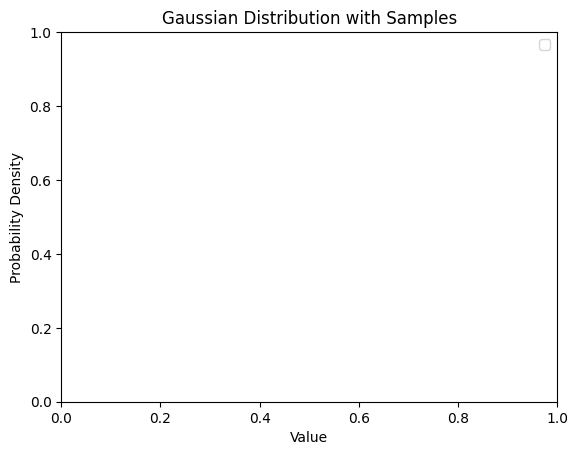

In [10]:
from photonic_indistinguishability_measures.variance import *
from base.circuit_helpers import fully_indistinguishable_matrix, random_GramMatrix_three_modes, random_preparation
from scipy.stats import norm
import matplotlib.pyplot as plt

n = 4
gram_matrix = fully_indistinguishable_matrix (n)
print ("Gram matrix: ", gram_matrix)
expected_value = Variance.calculate_expected_value_of_the_expected_variance (gram_matrix, n)
variance = Variance.calculate_variance_value_of_the_expected_variance (gram_matrix, n)

samples = 1000

sample_list = []
for _ in range (samples):
    random_matrix = random_preparation (n)
    var = Variance.calculate_expected_variance_from_gram_matrix_and_interferometer (gram_matrix, random_matrix, n)
    sample_list.append (var)


print ("Excpted value: ", expected_value)
print ("Variance: ", variance)

print ("Obtained mean: ", np.mean (sample_list))
print ("Obtained variance: ", np.var (sample_list))



std_dev = np.sqrt (variance)
x = np.linspace(expected_value - 4*std_dev, expected_value + 4*std_dev, 1000)
gaussian_curve = norm.pdf (x, expected_value, std_dev)


# Add labels and title
plt.title('Gaussian Distribution with Samples')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()
